# Predicting the price of the car based on the features in the dataset   

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv(r'C:\Users\Abc\Desktop\datasets_383055_741735_CarPrice_Assignment.csv')
df.head()

,CarName,fueltype,carlength,carwidth,carheight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,highwaympg,price
0,alfa-romero giulia,gas,168.8,64.1,48.8,130,3.47,2.68,9.0,111,5000,27,13495.0
1,alfa-romero stelvio,gas,168.8,64.1,48.8,130,3.47,2.68,9.0,111,5000,27,16500.0
2,alfa-romero Quadrifoglio,gas,171.2,65.5,52.4,152,2.68,3.47,9.0,154,5000,26,16500.0
3,audi 100 ls,gas,176.6,66.2,54.3,109,3.19,3.40,10.0,102,5500,30,13950.0
4,audi 100ls,gas,176.6,66.4,54.3,136,3.19,3.40,8.0,115,5500,22,17450.0


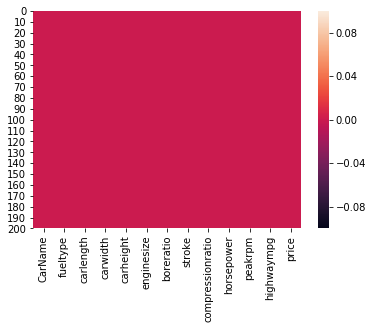

In [3]:
import seaborn as sns
df.isnull()
sns.heatmap(df.isnull())

In [4]:
x=df.iloc[:,-1:]
y=df.iloc[:,:12]

In [5]:
y.head()

,CarName,fueltype,carlength,carwidth,carheight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,highwaympg
0,alfa-romero giulia,gas,168.8,64.1,48.8,130,3.47,2.68,9.0,111,5000,27
1,alfa-romero stelvio,gas,168.8,64.1,48.8,130,3.47,2.68,9.0,111,5000,27
2,alfa-romero Quadrifoglio,gas,171.2,65.5,52.4,152,2.68,3.47,9.0,154,5000,26
3,audi 100 ls,gas,176.6,66.2,54.3,109,3.19,3.40,10.0,102,5500,30
4,audi 100ls,gas,176.6,66.4,54.3,136,3.19,3.40,8.0,115,5500,22


In [6]:
yy=pd.get_dummies(y['fueltype'],drop_first=True)

yy

,gas
0,1
1,1
2,1
3,1
4,1
...,...
200,1
201,1
202,1
203,0


In [7]:
y=pd.concat([y,yy],axis=1)

In [8]:
y.shape

(205, 13)

In [9]:
y

,CarName,fueltype,carlength,carwidth,carheight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,highwaympg,gas
0,alfa-romero giulia,gas,168.8,64.1,48.8,130,3.47,2.68,9.0,111,5000,27,1
1,alfa-romero stelvio,gas,168.8,64.1,48.8,130,3.47,2.68,9.0,111,5000,27,1
2,alfa-romero Quadrifoglio,gas,171.2,65.5,52.4,152,2.68,3.47,9.0,154,5000,26,1
3,audi 100 ls,gas,176.6,66.2,54.3,109,3.19,3.40,10.0,102,5500,30,1
4,audi 100ls,gas,176.6,66.4,54.3,136,3.19,3.40,8.0,115,5500,22,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,volvo 145e (sw),gas,188.8,68.9,55.5,141,3.78,3.15,9.5,114,5400,28,1
201,volvo 144ea,gas,188.8,68.8,55.5,141,3.78,3.15,8.7,160,5300,25,1
202,volvo 244dl,gas,188.8,68.9,55.5,173,3.58,2.87,8.8,134,5500,23,1
203,volvo 246,diesel,188.8,68.9,55.5,145,3.01,3.40,23.0,106,4800,27,0


In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [12]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
linreg = linear_model.LinearRegression()


In [13]:
y=y.drop('fueltype',axis=1)
y

,CarName,carlength,carwidth,carheight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,highwaympg,gas
0,alfa-romero giulia,168.8,64.1,48.8,130,3.47,2.68,9.0,111,5000,27,1
1,alfa-romero stelvio,168.8,64.1,48.8,130,3.47,2.68,9.0,111,5000,27,1
2,alfa-romero Quadrifoglio,171.2,65.5,52.4,152,2.68,3.47,9.0,154,5000,26,1
3,audi 100 ls,176.6,66.2,54.3,109,3.19,3.40,10.0,102,5500,30,1
4,audi 100ls,176.6,66.4,54.3,136,3.19,3.40,8.0,115,5500,22,1
...,...,...,...,...,...,...,...,...,...,...,...,...
200,volvo 145e (sw),188.8,68.9,55.5,141,3.78,3.15,9.5,114,5400,28,1
201,volvo 144ea,188.8,68.8,55.5,141,3.78,3.15,8.7,160,5300,25,1
202,volvo 244dl,188.8,68.9,55.5,173,3.58,2.87,8.8,134,5500,23,1
203,volvo 246,188.8,68.9,55.5,145,3.01,3.40,23.0,106,4800,27,0


In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [16]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
regressor = linear_model.LinearRegression()

In [17]:
X_train.dtypes

price    float64
dtype: object

In [18]:
y_train.dtypes

CarName              object
carlength           float64
carwidth            float64
carheight           float64
enginesize            int64
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
highwaympg            int64
gas                   uint8
dtype: object

In [19]:
y_train['compressionratio'] = df['compressionratio'].astype(float)

C:\Users\Abc\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [20]:
y_train['stroke'] = df['stroke'].astype(float)
y_train['boreratio'] = df['boreratio'].astype(float)
y_train['carlength'] = df['carlength'].astype(float)
y_train['carwidth'] = df['carwidth'].astype(float)
y_train['carheight'] = df['carheight'].astype(float)


C:\Users\Abc\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Abc\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Abc\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the doc

In [21]:
y_train.dtypes

CarName              object
carlength           float64
carwidth            float64
carheight           float64
enginesize            int64
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
highwaympg            int64
gas                   uint8
dtype: object

In [22]:
y=y.drop('CarName',axis=1)

In [23]:
y

,carlength,carwidth,carheight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,highwaympg,gas
0,168.8,64.1,48.8,130,3.47,2.68,9.0,111,5000,27,1
1,168.8,64.1,48.8,130,3.47,2.68,9.0,111,5000,27,1
2,171.2,65.5,52.4,152,2.68,3.47,9.0,154,5000,26,1
3,176.6,66.2,54.3,109,3.19,3.40,10.0,102,5500,30,1
4,176.6,66.4,54.3,136,3.19,3.40,8.0,115,5500,22,1
...,...,...,...,...,...,...,...,...,...,...,...
200,188.8,68.9,55.5,141,3.78,3.15,9.5,114,5400,28,1
201,188.8,68.8,55.5,141,3.78,3.15,8.7,160,5300,25,1
202,188.8,68.9,55.5,173,3.58,2.87,8.8,134,5500,23,1
203,188.8,68.9,55.5,145,3.01,3.40,23.0,106,4800,27,0


In [24]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [25]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
regressor = linear_model.LinearRegression()

In [26]:
regressor.fit(y_train,X_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [27]:
x.pred=regressor.predict(y_test)

C:\Users\Abc\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


In [32]:
x_pred_train=regressor.predict(y_train)

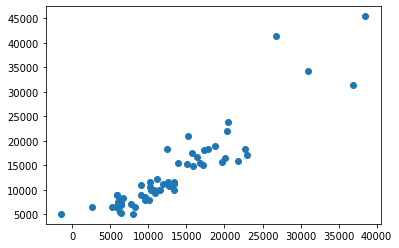

In [55]:
plt.scatter(x.pred,X_test)

In [29]:
X_test

,price
52,6795.0
181,15750.0
5,15250.0
18,5151.0
188,9995.0
...,...
198,18420.0
143,9960.0
24,6229.0
30,6479.0


# R*2

In [30]:
from sklearn.metrics import r2_score
score=r2_score(X_test,x.pred)

In [31]:
score

0.8377021385895717

The model is pretty good

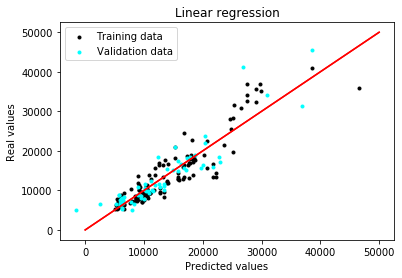

In [65]:
plt.plot([12, 5e4], [12, 5e4], c = "red")
plt.scatter(x_pred_train,X_train, c = "black", marker = ".", label = "Training data")
plt.scatter(x.pred,X_test, c = "cyan", marker = ".", label = "Validation data")
plt.title("Linear regression")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "upper left")
plt.plot([12, 5e4], [12, 5e4], c = "red")
plt.show()